In [4]:
import anndata
import spaco

import scanpy as sc

import matplotlib
import seaborn as sns

import numpy as np
import pandas as pd
import random
import scipy
from skimage import color
from spaco.utils import hex_to_rgb, lab_to_hex

In [5]:
from scipy import stats
from matplotlib import pyplot as plt

# Load data

In [6]:
adata = anndata.read("./data/10DPI_1_left.h5ad")
radata = anndata.read("./data/15DPI_1_left.h5ad")
adata, radata

(AnnData object with n_obs × n_vars = 4811 × 27600
     obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
     var: 'Gene'
     uns: 'Injury_10DPI_rep1_SS200000147BL_B5', '__type', 'angle_dict'
     obsm: 'X_pca', 'X_spatial', 'spatial'
     varm: 'PCs'
     layers: 'counts'
     obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances',
 AnnData object with n_obs × n_vars = 4514 × 23331
     obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'Celltype', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
     var: 'Gene'
     uns: 'Injury_15DPI_rep2_FP200000266TR_E2', '__type', 'angle_dict'
     obsm: 'X_pca', 'X_spatial', 'spatial'
     varm: 'PCs'
     layers: 'counts'
     obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances')

/tmp/ipykernel_1756981/3334864793.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', 20)


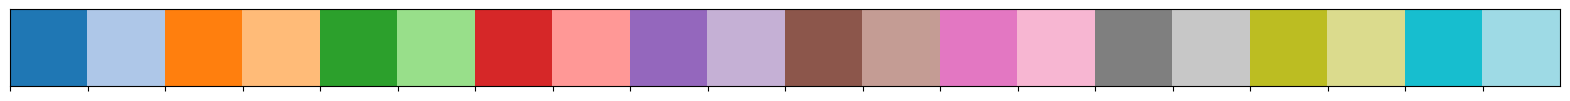

In [7]:
from pylab import *

cmap = cm.get_cmap('tab20', 20)
palette_default = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(20)]
sns.palplot(palette_default)

In [8]:
cluster_key = "Annotation"
color_mapping_adata = spaco.colorize_mutiple_slices([adata,radata],cluster_key,
                                              radius=90,
                                              n_neighbors=16,
                                              neighbor_kwargs={'n_cells':3},
                                              palette=palette_default,
)
                                              

|-----> Calculating cluster distance graph for slice 0... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating cluster distance graph for slice 1... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Merging cluster distance graph... 
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...


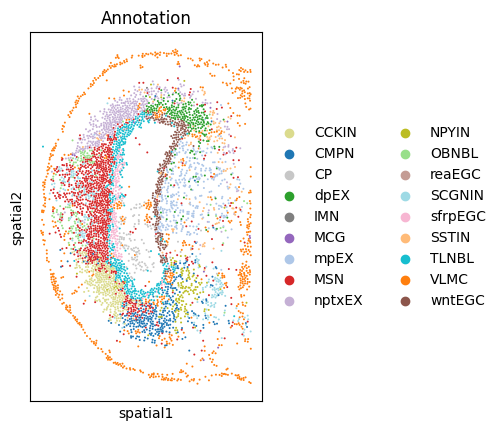

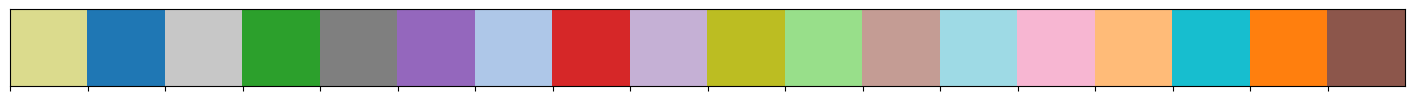

In [13]:
color_mapping = {k: color_mapping_adata[k] for k in adata.obs[cluster_key].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata, color=cluster_key , spot_size=30, palette=palette_spaco,save="Figure5D_adjacent_slice_DP10.pdf")
sns.palplot(palette_spaco)

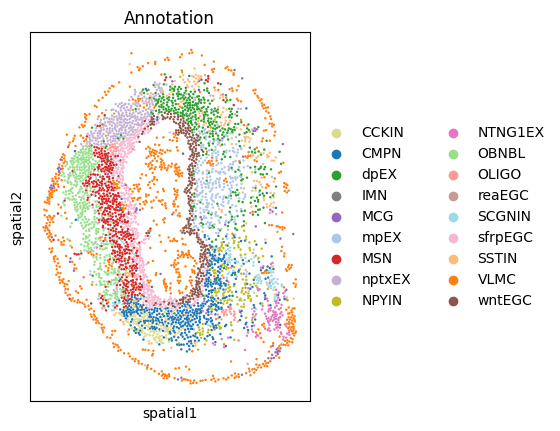

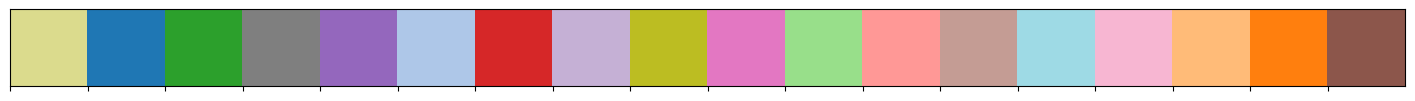

In [14]:
color_mapping2 = {k: color_mapping_adata[k] for k in radata.obs[cluster_key].cat.categories}

# Set new colors for adata
palette_spaco2 = list(color_mapping2.values())

# Spaco colorization
sc.pl.spatial(radata, color=cluster_key, spot_size=30, palette=palette_spaco2,save="Figure5D_adjacent_slice_DP15.pdf")
sns.palplot(palette_spaco2)

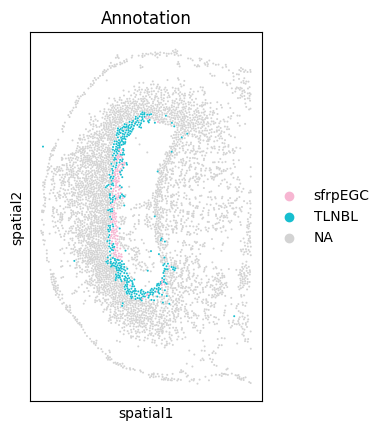

In [11]:
sc.pl.spatial(adata, groups=['TLNBL','sfrpEGC'], spot_size=30,color="Annotation", palette=color_mapping,save="sFigure5D_adjacent_slice_cluster_highlight.pdf")

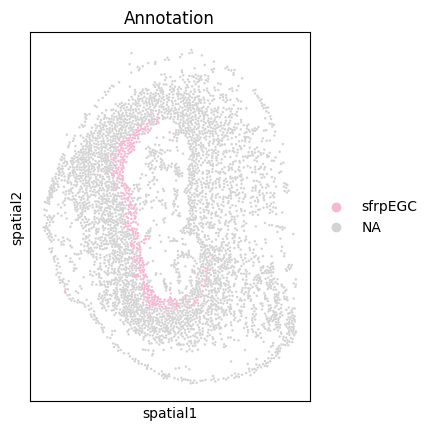

In [12]:
sc.pl.spatial(radata, groups=['sfrpEGC'], spot_size=30,color="Annotation", palette=color_mapping2,save="sFigure5D_adjacent_slice_ref_cluster_highlight.pdf")

In [15]:
import session_info


session_info.show(excludes=['base'])